Business Understanding:
- Direct marketing activities (e.g. promotions, pricing incentives) to those customers who are profitable and most likely to buy

Problem Definition:

- Predict response to promotions and pricing incentives
- Response Variable:  Sales dollars;  Whether a customer will buy or not
- Predictor Variables:  Demographics (e.g. Age, Sex, Marital Status, Education level, etc), and previous response to promotions, location, season, lifestyle, etc

Data Understanding:

- Sources include:  Loyalty Programs (which have customer profile), CRM systems, sales transactions.  External datasets?  Social Media?
- Will all data be structured data?  Will we also use unstructured datasets?
- What data transforms will be required?  Missing value imputation?  NULL values?  Data integrity checks?  

Modeling Techniques:

- Linear Regression (for estimating Sales $)
- Logistic Regression (for estimating likelihood of customer buying)

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
campaign_df = pd.read_csv("Marketing_Campaign_Effectiveness.csv")
churn_df = pd.read_csv(
    "Customer_Churn_Dataset.csv",
    index_col=0
)
customer_df = pd.read_csv(
    "Marketing_Customer_Value_Analysis.csv",
    index_col=0
)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


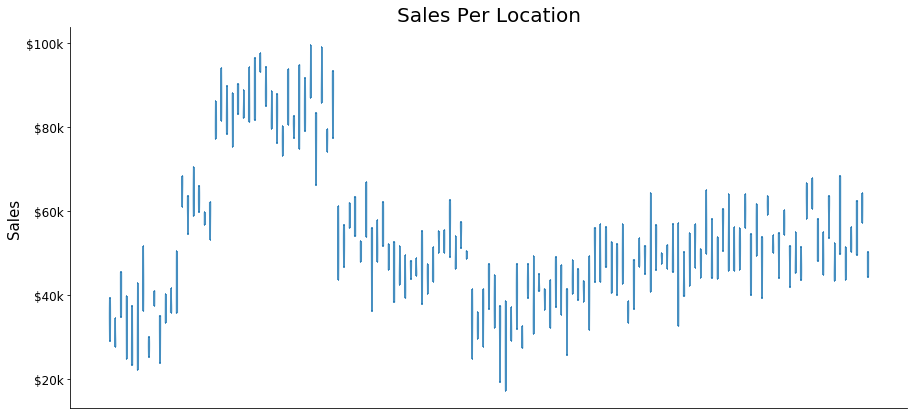

In [106]:
# campaign_df[campaign_df["LocationID"] == 1]["SalesInThousands"].tolist()
campaign_df["LocationID"].unique()
sales_per_location = [
    campaign_df[campaign_df["LocationID"] == location_id]["SalesInThousands"].tolist()
    for location_id in campaign_df["LocationID"].unique()
]

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.violinplot(sales_per_location)
ax.set_xticklabels(ax.get_xticks())
ax.set_yticklabels(ax.get_yticks())
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.tick_params(
    axis='y',
    which='both',
    labelsize=12
)

ax.set_yticklabels(
    [
        "" if item.get_text() == "0.0" 
        else"$" + str(int(float(item.get_text()))) + "k"
        for item in ax.get_yticklabels()
    ]
)
ax.set_xticklabels([])
ax.set_ylabel("Sales", fontsize=15)
ax.set_title("Sales Per Location", fontsize=20)
# plt.savefig("graphs/score_diff_{}.png".format(year), bbox_inches="tight")
# plt.close()
plt.show()

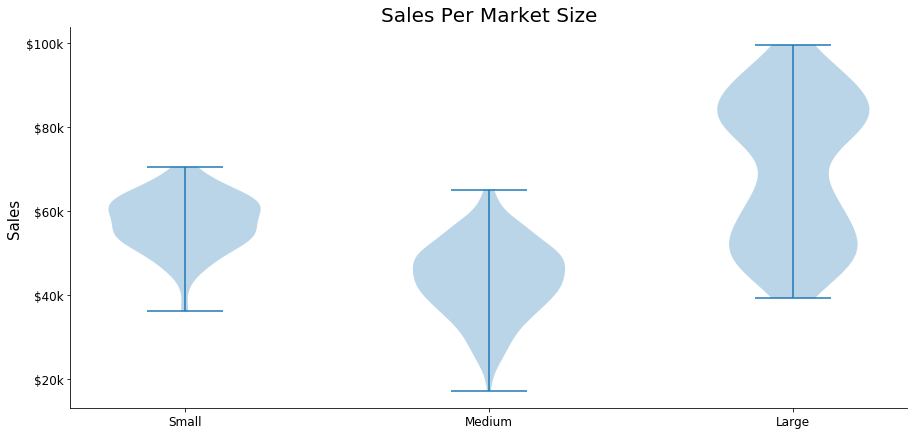

In [107]:
sales_per_location = [
    campaign_df[campaign_df["MarketSize"] == location_id]["SalesInThousands"].tolist()
    for location_id in ['Small','Medium','Large']
]

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.violinplot(sales_per_location)
ax.set_xticklabels(ax.get_xticks())
ax.set_yticklabels(ax.get_yticks())
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(1, 4, 1))
ax.set_xticklabels(["Small", "Medium", "Large"])
ax.tick_params(
    axis='both',
    which='both',
    labelsize=12
)

ax.set_yticklabels(
    [
        "" if item.get_text() == "0.0" 
        else"$" + str(int(float(item.get_text()))) + "k"
        for item in ax.get_yticklabels()
    ]
)
ax.set_ylabel("Sales", fontsize=15)
ax.set_title("Sales Per Market Size", fontsize=20)
# plt.savefig("graphs/score_diff_{}.png".format(year), bbox_inches="tight")
# plt.close()
plt.show()

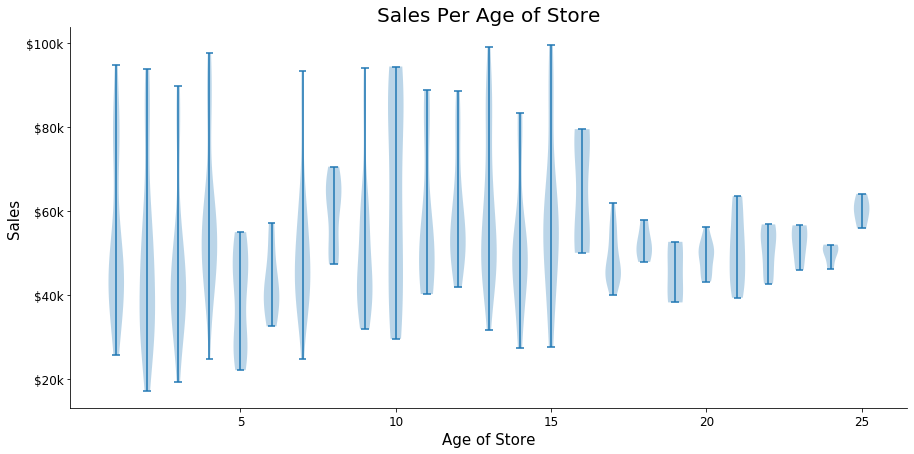

In [136]:
campaign_df.sort_values('AgeOfStore')
sales_per_age = [
    campaign_df[campaign_df["AgeOfStore"] == age]["SalesInThousands"].tolist()
    for age in campaign_df["AgeOfStore"].unique()
]

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
violin_plot = ax.violinplot(sales_per_age)
ax.set_xticklabels(ax.get_xticks())
ax.set_yticklabels(ax.get_yticks())
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.set_yticklabels(
    [
        "$" + str(int(float(item.get_text()))) + "k"
        for item in ax.get_yticklabels()
    ]
)  
xticks = ax.xaxis.get_major_ticks()
xticks[1].set_visible(False)
ax.set_xticklabels(
    [
        "" if item.get_text() == "0.0" or item.get_text() == "-5.0"
        else str(int(float(item.get_text())))
        for item in ax.get_xticklabels()
    ]
)
ax.tick_params(
    axis='both',
    which='both',
    labelsize=12
)
ax.set_ylabel("Sales", fontsize=15)
ax.set_xlabel("Age of Store", fontsize=15)
ax.set_title("Sales Per Age of Store", fontsize=20)
plt.show()

In [103]:
campaign_df["AgeOfStore"].unique()

array([ 4,  5, 12,  1, 10, 15,  6, 22,  8, 19, 11, 13,  3,  7,  2, 23,  9,
       28, 25, 14, 24, 18, 27, 17, 20])

In [104]:
campaign_df.sort_values('AgeOfStore')

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
164,4,Small,301,1,2,1,49.61
90,3,Large,204,1,2,3,88.12
91,3,Large,204,1,2,4,75.29
412,8,Medium,709,1,2,1,39.73
413,8,Medium,709,1,2,2,50.30
...,...,...,...,...,...,...,...
394,8,Medium,704,27,1,3,55.46
195,4,Small,308,28,2,4,51.33
194,4,Small,308,28,2,3,47.93
193,4,Small,308,28,2,2,58.01
